In [7]:
import keras
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

# create dataframe mnist(0,1)

Using TensorFlow backend.


In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='datasets/')

# Convert sklearn 'datasets bunch' object to Pandas DataFrames
y = pd.Series(mnist.target).astype('int').astype('category')
X = pd.DataFrame(mnist.data)

In [9]:
y.shape

(70000,)

In [10]:
X['label']=y

In [11]:
df_0 = X.loc[X['label']==0]

In [12]:
df_0 = df_0[0:200]

In [13]:
df_1 = X.loc[X['label']==1]

In [14]:
df_1 = df_1[0:200]

In [15]:
df = pd.concat([df_0,df_1])

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_mnist = df.drop(['label'],axis=1)

In [18]:
df_mnist.shape

(400, 784)

# K-means

In [19]:
from lib.HomeMadeKmeans import *

In [20]:
itr = 200
k = 2

In [21]:
kmeans(itr,k,df_mnist)

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2916666666666667,
  1.2864583333333333,
  0.6302083333333334,
  0.625,
  2.6927083333333335,
  2.5104166666666665,
  2.3072916666666665,
  1.65625,
  1.7135416666666667,
  1.328125,
  0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7604166666666666,
  2.885

In [22]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,point_data,distance,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1294.3006758694846, 2396.196788093152]",0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1434.5104674497395, 2474.281037602068]",0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1933.4447345707988, 2364.420712750444]",0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1622.9806298822168, 2463.054269749142]",0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1693.2761145108243, 3012.6418110826457]",0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1861.6384276731999, 2914.8666035513024]",0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1897.1459787154527, 2824.9405421174274]",0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2318.019916503351, 2389.9047955689202]",0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1829.0665936863927, 2742.504066885466]",0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1643.6261835414027, 2417.4993773681995]",0


In [23]:
df_mnist['label'] = df['label']

In [24]:
df_mnist[['cluster','label']]

,cluster,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [25]:
df_mnist["cluster_1"] =df_mnist["cluster"].apply(lambda x : 0 if x==1 else 1)

In [26]:
df_mnist[['cluster_1','label']]

,cluster_1,label
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [27]:
# accuarcy 
df_mnist['tp'] = df_mnist["cluster_1"] == df_mnist["label"]
df_mnist['tp']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
6093    False
6094    False
6095    False
6096    False
6097    False
6098    False
6099    False
6100    False
6101    False
6102    False
6103    False
6104    False
6105    False
6106    False
6107    False
6108    False
6109    False
6110    False
6111    False
6112    False
6113    False
6114    False
6115    False
6116    False
6117    False
6118    False
6119    False
6120    False
6121    False
6122    False
Name: tp, Length: 400, dtype: bool

In [41]:
df_mnist['tp'].value_counts()[0]/400

0.98

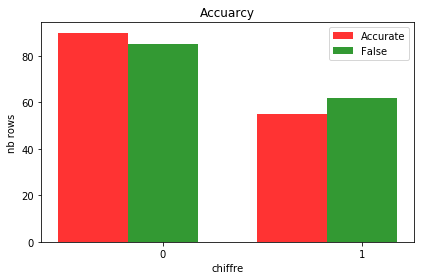

In [38]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
means_accurate = (df_0['cluster_1'].value_counts()[1], df_0['cluster_1'].value_counts()[0])
means_false = (df_1['cluster_1'].value_counts()[0], 0)
 
# create plot
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(df_0['cluster_1'].value_counts()[1], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Accurate')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='False')
 
plt.xlabel('chiffre')
plt.ylabel('nb rows')
plt.title('Accuarcy')
plt.xticks(index + bar_width, ('0','1'))
plt.legend()
 
plt.tight_layout()
plt.show()